In [1]:
import pandas as pd
data = pd.read_csv('test.csv',sep=",")

from sklearn.naive_bayes import BernoulliNB
x=data.drop(['年份','次年房价是否大幅上涨'],axis=1)
y=data['次年房价是否大幅上涨']
clf=BernoulliNB()
clf.fit(x,y)
print(clf.score(x,y))

x_2019=[[0,1,0]]
y_2020=clf.predict(x_2019)
print(y_2020)


0.8
[0]


d:\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


模型得分:0.590


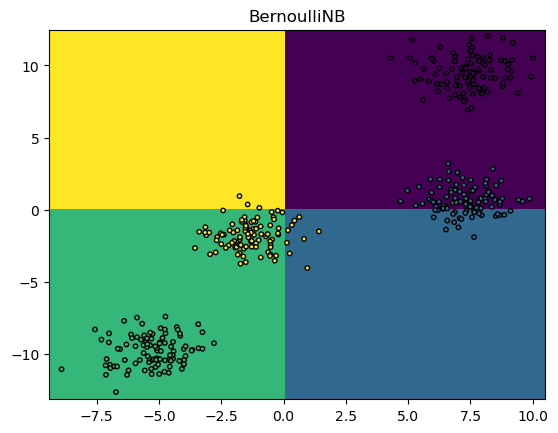

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

x,y=make_blobs(n_samples=400, centers=4, random_state=8)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=8)
nb=BernoulliNB()
nb.fit(x_train,y_train)
print('模型得分:{:.3f}'.format(nb.score(x_test,y_test)))

import numpy as np
import matplotlib.pyplot as plt
x_min,x_max=x[:,0].min()-0.5,x[:,0].max()+0.5
y_min,y_max=x[:,1].min()-0.5,x[:,1].max()+0.5
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),
np.arange(y_min,y_max,0.1))
z=nb.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z)
plt.scatter(x[:,0],x[:,1],c=y,s=10,edgecolors='k')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('BernoulliNB')
plt.show()

训练集准确率: 1.0


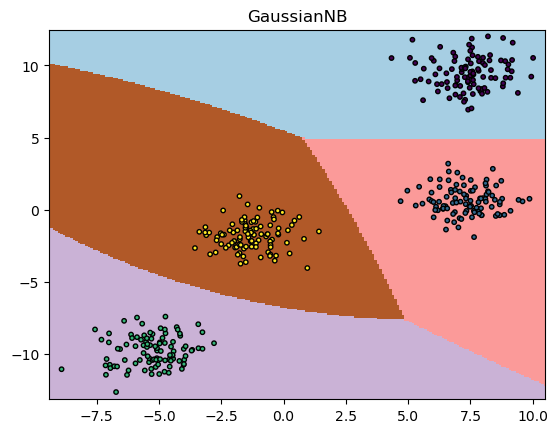

In [3]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
print("训练集准确率:",gnb.score(x_train,y_train))

z_gnb=gnb.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z_gnb,cmap=plt.cm.Paired)
plt.scatter(x[:,0],x[:,1],c=y,s=10,edgecolors='k')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('GaussianNB')
plt.show()


class
0    4208
1    3916
dtype: int64
模型准确率: 0.8055145248645987
模型准确率: 0.8084687346134909


d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24471 (\N{CJK UNIFIED IDEOGRAPH-5F97}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabt

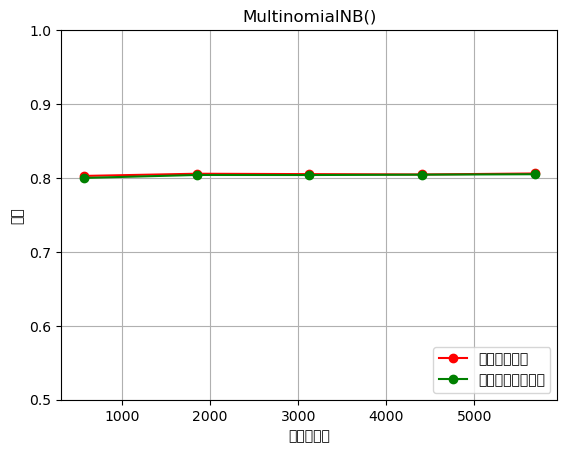

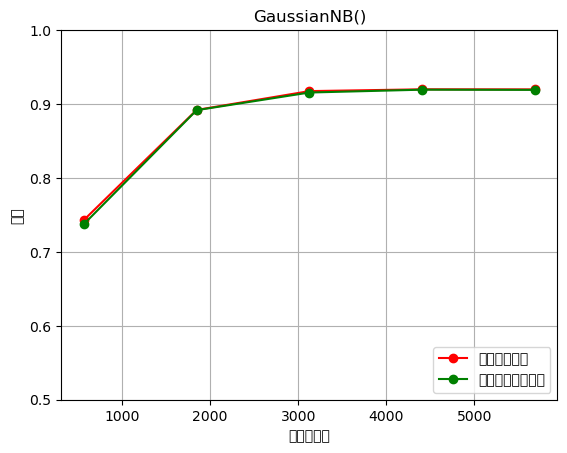

In [5]:
from sklearn.model_selection import train_test_split
mushroom=pd.read_csv('mushrooms.csv')
mushroom.head()
mushroom.isnull().sum()
mushroom['class'].unique()

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in mushroom.columns:
    mushroom[col]=le.fit_transform(mushroom[col])
mushroom.head()
print(mushroom.groupby('class').size())

from sklearn.naive_bayes import MultinomialNB
x=mushroom.iloc[:,1:23]
y=mushroom.iloc[:,0]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
print('模型准确率:',mnb.score(x_train,y_train))
print('模型准确率:',mnb.score(x_test,y_test))

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                            n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)
):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("训练样本数")
    plt.ylabel("得分")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="训练集上得分"
    )
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="交叉验证集上得分"
    )
    plt.legend(loc="lower right")
    return plt

cv=ShuffleSplit(n_splits=30,test_size=0.3,random_state=28)
estimateors = [MultinomialNB(),GaussianNB()]
for estimator in estimateors:
    title=estimator
    plot_learning_curve(estimator, title, x, y, ylim=(0.5, 1.0), cv=cv, n_jobs=-1)
    plt.show()